In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

### A simple clustering exercise with 1-D numerical data

In [2]:
raw_data = [1, 2, 4, 6, 11, 12, 15, 18, 30, 35, 36]
np_raw_data = np.asarray(raw_data)

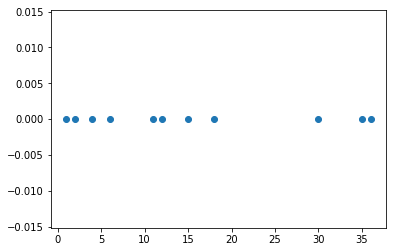

In [3]:
plt.scatter(raw_data, np.zeros_like(raw_data))

In [4]:
km_model_1 = KMeans(3)                     # telling K-Means that we want 3 clusters
km_model_1.fit(np_raw_data.reshape(-1, 1)) # reshape required as our data is 1-D
print(km_model_1.cluster_centers_)         # the finalized centroids
print(km_model_1.labels_)                  # the cluster numbers for each data point

[[ 3.25      ]
 [33.66666667]
 [14.        ]]
[0 0 0 0 2 2 2 2 1 1 1]


In [5]:
data_cluster_mapping = []
for n, c in zip(raw_data, km_model_1.labels_):
    data_cluster_mapping.append((n, c))

df_dcm = pd.DataFrame(data_cluster_mapping, columns=['data', 'cluster'])
df_dcm

,data,cluster
0,1,0
1,2,0
2,4,0
3,6,0
4,11,2
5,12,2
6,15,2
7,18,2
8,30,1
9,35,1


In [6]:
df_dcm_gb_cluster = df_dcm.groupby('cluster')
for label, group in df_dcm_gb_cluster:
    print('\nCluster: ', label)
    print('\t', group.data.tolist())


Cluster:  0
	 [1, 2, 4, 6]

Cluster:  1
	 [30, 35, 36]

Cluster:  2
	 [11, 12, 15, 18]


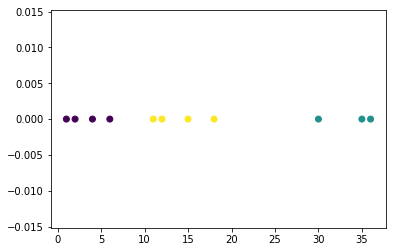

In [7]:
plt.scatter(raw_data, np.zeros_like(raw_data), c=km_model_1.labels_)

### Another clustering exercise with text data (collection of documents)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [9]:
raw_data_2 = ['This little kitty came to play when I was eating at a restaurant.',
              'Google Translate app is incredible!',
              'Climbing ninja cat!',
              'This is a key promoter extension for Google Chrome.',
              "Best cat photo I've even taken!"]

In [10]:
item_count = len(raw_data_2)

#### Convert the documents into TFIDF vectors

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
data_tfidf_vector = tfidf_vectorizer.fit_transform(raw_data_2)

#### UDF to calculate optimal value of 'k'

In [12]:
def get_optimal_k(X, n):
    scores = {}
    for k in range(2, n):
        km_model = KMeans(k).fit(X)
        scores[k] = silhouette_score(X, km_model.labels_, metric='cosine')
    max_score = max(scores.values())
    for k, v in scores.items():
        if v == max_score:
            ok = k
            break
    return ok

In [13]:
optimal_k = get_optimal_k(data_tfidf_vector, item_count)
km_model_2 = KMeans(optimal_k).fit(data_tfidf_vector)
df_text_clusters = pd.DataFrame()
df_text_clusters['text'] = raw_data_2
df_text_clusters['cluster'] = km_model_2.labels_
df_text_clusters

,text,cluster
0,This little kitty came to play when I was eati...,2
1,Google Translate app is incredible!,0
2,Climbing ninja cat!,1
3,This is a key promoter extension for Google Ch...,0
4,Best cat photo I've even taken!,1


#### Remember this kind of document clustering can be done better if pre-processing steps are applied to the data, such as lemmatization